# <center>On performance portability of physical problems using libCEED</center>

<br>
<br>
<br>

### <center>Leila Ghaffari<sup>1</sup>, 
<br>
<center>Valeria Barra<sup>1,2</sup>, Jeremy L. Thompson<sup>1</sup>, James Wright<sup>3</sup>, and Jed Brown<sup>1</sup></center>  

<br>
  
<center><sub><sup><sup>1</sup> Department of Computer Science, CU Boulder</sup></sub></center>  
<center><sub><sup><sup>2</sup> Department of Environmental Science and Engineering, California Institute of Technology</sup></sub></center>
<center><sub><sup><sup>3</sup> Department of Aerospace Engineering, CU Boulder</sup></sub></center>  

<br>
<br>
<br>

<center>WCCM-APCOM</center>
<center>July 2022</center>

<img align="left" src="ecp.png" width="500"/>  <img align="right" src="ceed-exascale-landscape.png" width="600"/>

# Primitive or conservative variables?

#### <center>Compressible Navier-Stokes equations in conservative form</center>

----
\begin{aligned}
   \frac{\partial \rho}{\partial t} + \nabla \cdot \rho \boldsymbol{u} &= 0 \\
   \frac{\partial ( \rho \boldsymbol{u})}{\partial t} + \nabla \cdot \left( \rho \boldsymbol{u} \otimes \boldsymbol{u} + P \boldsymbol{I}_3 -\boldsymbol\sigma \right) + \rho g \boldsymbol{\hat k} &= 0 \\
   \frac{\partial E}{\partial t} + \nabla \cdot \left( (E + P)\boldsymbol{u} -\boldsymbol{u} \cdot \boldsymbol{\sigma} - k \nabla T \right) &= 0 \, , \\
\end{aligned}

-----

<center>$\boldsymbol{\sigma} = \mu(\nabla \boldsymbol{u} + (\nabla \boldsymbol{u})^T + \lambda (\nabla \cdot \boldsymbol{u})\mathbf{I}_3)$</center>


<center>$P = \left( {c_p}/{c_v} -1\right) \left( E - {\frac{\rho}{2} \boldsymbol{u}\cdot\boldsymbol{u}} - \rho g z \right)$</center>

<center>$T = \left( \frac{E}{\rho} - \frac{\boldsymbol{u}\cdot\boldsymbol{u}}{2} - g z \right) / c_v$

#### <center>Vector form</center>

----
Conservative variables: 
\begin{aligned}
\frac{\partial \boldsymbol{U}}{\partial t} + \nabla \cdot \boldsymbol{F}(\boldsymbol{U}) -S(\boldsymbol{U}) = 0 \, ,
\end{aligned}
&nbsp;
<center>$\boldsymbol U = {\rho, \rho \boldsymbol u, E}$</center>

Primitive variables: 
\begin{aligned}
\frac{\partial}{\partial t} \boldsymbol U (\boldsymbol Y) + \nabla \cdot \boldsymbol{F}(\boldsymbol{Y}) -S(\boldsymbol{Y})  = 0 \,
\end{aligned}
&nbsp;
<center>$\boldsymbol{Y} = {P, \boldsymbol u, T}$</center>

Hauke and Hughes, 1994:
>Conservation variables attain about the same level of accuracy as primitive variables for wall pressure
and skin friction, although they are the **least accurate for wall heat flux**.

# [libCEED](https://libceed.readthedocs.io): Efficient Extensible Discretization  

<img align="left" src="libceed-badges.png" width="100%"/>

* High-order finite/spectral element (FEM/SEM) library exploiting tensor-product structure

* Open source (BSD-2 license) C library with Fortran, Python, Julia, and Rust interfaces

* [libCEED User Manual](https://libceed.readthedocs.io/en/latest/)



https://libceed.org

# libCEED's mission


* Purely algebraic FEM library

* Single source vanilla C for QFunctions

* Same source code can call multiple CEEDs with different backends

* Backend plugins with run-time selection
    * e.g., `./bps -ceed /gpu/cuda`

* Easy debugging for users

* User choice of single or double precision

* Available via MFEM, PETSc, Nek5000


<img align="right" src="libCEEDBackends.png" width="100%"/>

<center><img align="center" src="libCEEDDecomposition.png" width="2000"/></center>

* <font color='red'>$P$</font> - Process decomposition 
* $\mathcal E$</font> - Element restriction
* <font color='blue'>$B$</font> - Basis (DoFs-to-Qpts) evaluator 
* <font color='green'>$D$</font> - Operator at quadrature point 

# Compressible Navier-Stokes mini-app


### Problems

---
* **Advection**
   * Rotation
   * Translation
* **Euler**
    * Isentropic Vortex 
    * Shock Tube
* **Navier-Stokes**
    * Density Current
    * Channel
    * Blasius Boundary Layer
* **Turbulent-Synthetic Turbulence Generation** (STG)

### Features

---
* **Stabilization Techniques**
    * SU (streamline-upwind)
    * SUPG (streamline-upwind/Petrov-Galerkin)  
        * implicit time-stepping

* **Unstructured Mesh**

* **Conservative and Primitive variables**

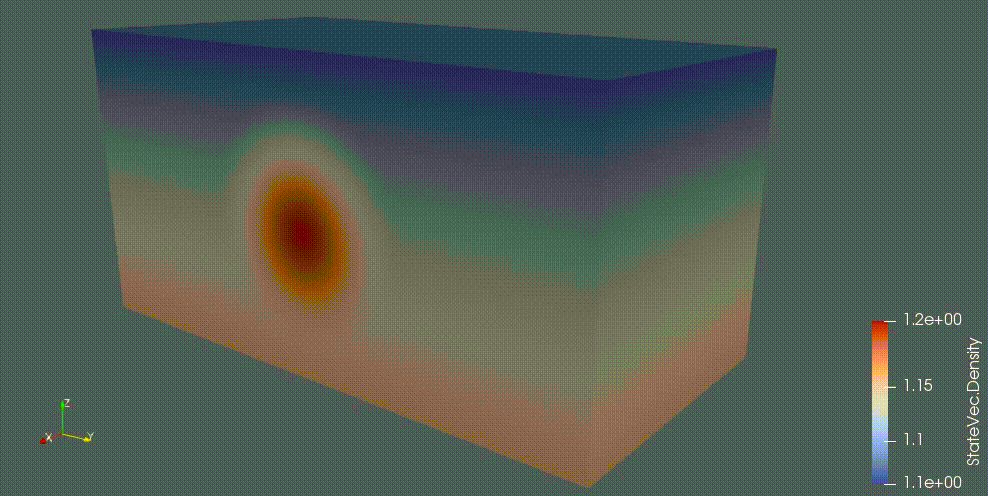


<center><sub><sup>Thanks to James Wright, Kenneth Jansen, Valeria Barra, Jeremy Thompson, Timothy Aiken, Adeleke Bankole, and Jed Brown.</sup></sub></center>

## Blasius Boundary Layer

#### Compressible Blasius boundary layer with Howarth transformation

----
\begin{aligned}
   2 (\rho \mu f^{\prime \prime})^{\prime} + f f^{\prime \prime} &= 0 \\
     (\rho \mu h^{\prime})^{\prime} + \text{Pr} f h^{\prime} + \text{Pr} (\gamma - 1) \text{Ma}^{2} \rho \mu (f^{\prime \prime})^2 &= 0\,  \\
\end{aligned}

----
<sub><sup>$f$: Similarity form for the stream function</sup></sub>  
<sub><sup>$h$: Specific enthalpy at the wall</sup></sub>  
<sub><sup>$\gamma$ = Specific heat ratio</sup></sub>  
<sub><sup>Ma = Mach number</sup></sub>  
<sub><sup>Pr = Prandtl number</sup></sub>  


#### Boundary conditions:
$f(0) = f^{\prime}(0) = h(0) -h_{wall} = f^{\prime}(\infty) - 1 = h(\infty) = 0 $

#### Solution from Chebychev polynomial

----

<center><img align="center" src="balsius-solution.png" width="2000"/></center>

## Blasius Boundary Layer - Energy

<center>$E = \rho \left( c_v T + \frac{\boldsymbol{u}\cdot\boldsymbol{u}}{2}\right)$
    
-------

#### Polynomial degree 1

----

<center><img align="center" src="Energy_p1.png" width="1200"/></center>

#### Polynomial degree 2

----

<center><img align="center" src="Energy_p2.png" width="1200"/></center>

## Blasius Boundary Layer - Temperature

<center>$T = \left( \frac{E}{\rho} - \frac{\boldsymbol{u}\cdot\boldsymbol{u}}{2}\right) / c_v$
        
-------

#### Polynomial degree 1

----

<center><img align="center" src="Temperature_p1.png" width="1200"/></center>

#### Polynomial degree 2

----

<center><img align="center" src="Temperature_p2.png" width="1200"/></center>

## Isentropic Vortex

<center>mean flow:</center>
<center>$\rho=1$, $P=1$, $T=P/\rho= 1$, and $\boldsymbol{u}=(u_1,u_2,0)$</center>

\begin{aligned}
   (\delta u_1, \, \delta u_2) &= \frac{\epsilon}{2 \pi} \, e^{0.5(1-r^2)} \, (-\bar{y}, \, \bar{x}) \,  \\
   \delta T &= - \frac{(\gamma-1) \, \epsilon^2}{8 \, \gamma \, \pi^2} \, e^{1-r^2} \,  \\
   \delta S &= 0 \,   \,
\end{aligned}
<img align="center" src="enthropy.png" width="50%"/>

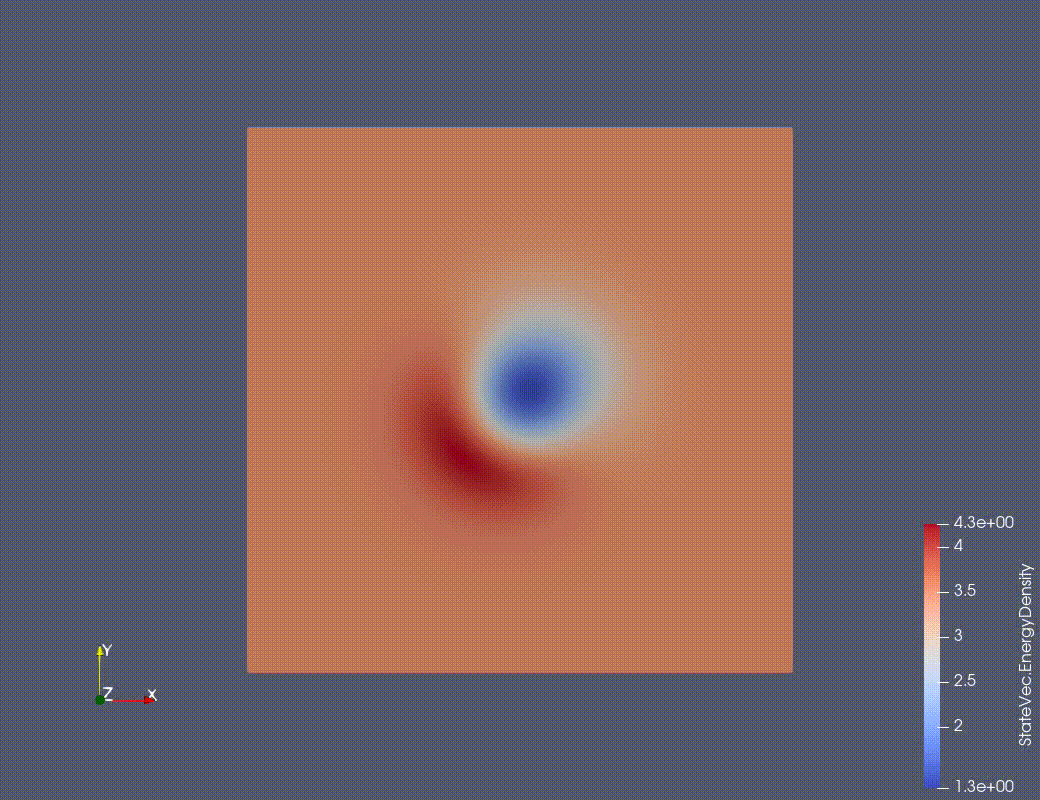

# Isentropic Vortex - Primitive or Conservative?

# Outlook

  * Turbulence modeling
  * MMS with Algorithmic Differentiation (Enzyme)
  * Robust matrix-free solvers
  * Strong scaling
  * SVE backend
  * SYCL/DPC++ backend
  * Mixed-precision support
  
  
&nbsp;



<center>We invite contributors and friendly users.


<img align="right" src="ceed-logo-no-words.png" width="200"/>

&nbsp;

&nbsp;

&nbsp;

<center><sub><sup>This research is supported by the Exascale Computing Project (17-SC-20-SC), a collaborative effort of two U.S. Department of Energy organizations (Office of Science and the National Nuclear Security Administration) responsible for the planning and preparation of a capable exascale ecosystem, including software, applications, hardware, advanced system engineering and early testbed platforms, in support of the nation’s exascale computing imperative. This research
is supported by the U.S. Department of Energy, Office of Science, Office of Advanced Scientific Computing Research under contract DE-AC02-06CH11357 and Award Number DE-SC0016140.</sup></sub></center>

